In [1]:
# importando as librarys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# ler os dados

base_dados = pd.read_csv('Startups+in+2021+end.csv')

# dimensoes

print('Linhas: {}, Colunas: {}'.format(base_dados.shape[0], base_dados.shape[1]))

Linhas: 936, Colunas: 8


In [3]:
# primeiros registros

base_dados.head(5)

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [5]:
# colunas

base_dados.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [6]:
# renomeando colunas

base_dados.rename(columns=
                  {
                      'Unnamed: 0':'Id',
                      'Company': 'Empresa',
                      'Valuation ($B)': 'Valor ($)',
                      'Date Joined': 'Data de Adesão',
                      'Country': 'País',
                      'City': 'Cidade',
                      'Industry': 'Setor',
                      'Select Investors': 'Investidores'
                  }, inplace= True)
base_dados.columns

Index(['Id', 'Empresa', 'Valor ($)', 'Data de Adesão', 'País', 'Cidade',
       'Setor', 'Investidores'],
      dtype='object')

In [7]:
# Verificando os tipos de dados

base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor ($)       936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   País            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [8]:
# retorno de valores nulos

base_dados.isnull().sum()

Id                 0
Empresa            0
Valor ($)          0
Data de Adesão     0
País               0
Cidade            15
Setor              0
Investidores       1
dtype: int64

<AxesSubplot:title={'center':'Analisando campos nulos'}>

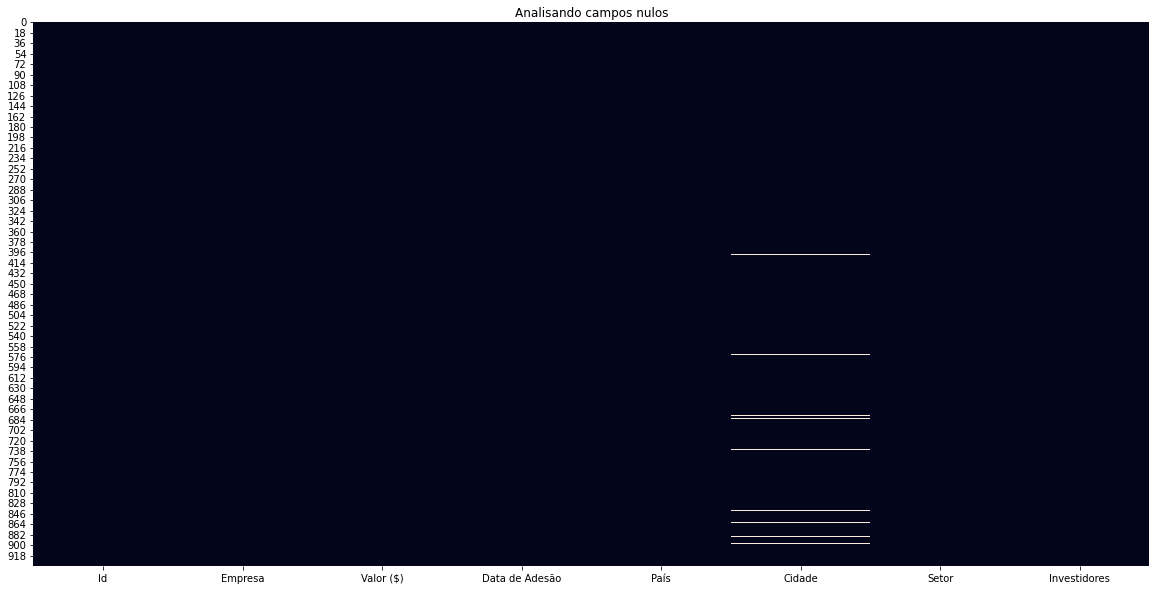

In [11]:
# gráfico de valores nulos

plt.figure(figsize= (20, 10))
plt.title('Analisando campos nulos')
sns.heatmap(base_dados.isnull(), cbar= False);

In [12]:
# Campos unicos

base_dados.nunique()

Id                936
Empresa           935
Valor ($)         192
Data de Adesão    589
País               47
Cidade            239
Setor              17
Investidores      920
dtype: int64

In [13]:
# valores unicos de uma coluna 'Setor'

base_dados['Setor'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [14]:
# valores unicos rank

base_dados['Setor'].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Setor, dtype: int64

In [15]:
# valores unicos rank percentual

base_dados['Setor'].value_counts( normalize= True )

Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: Setor, dtype: float64

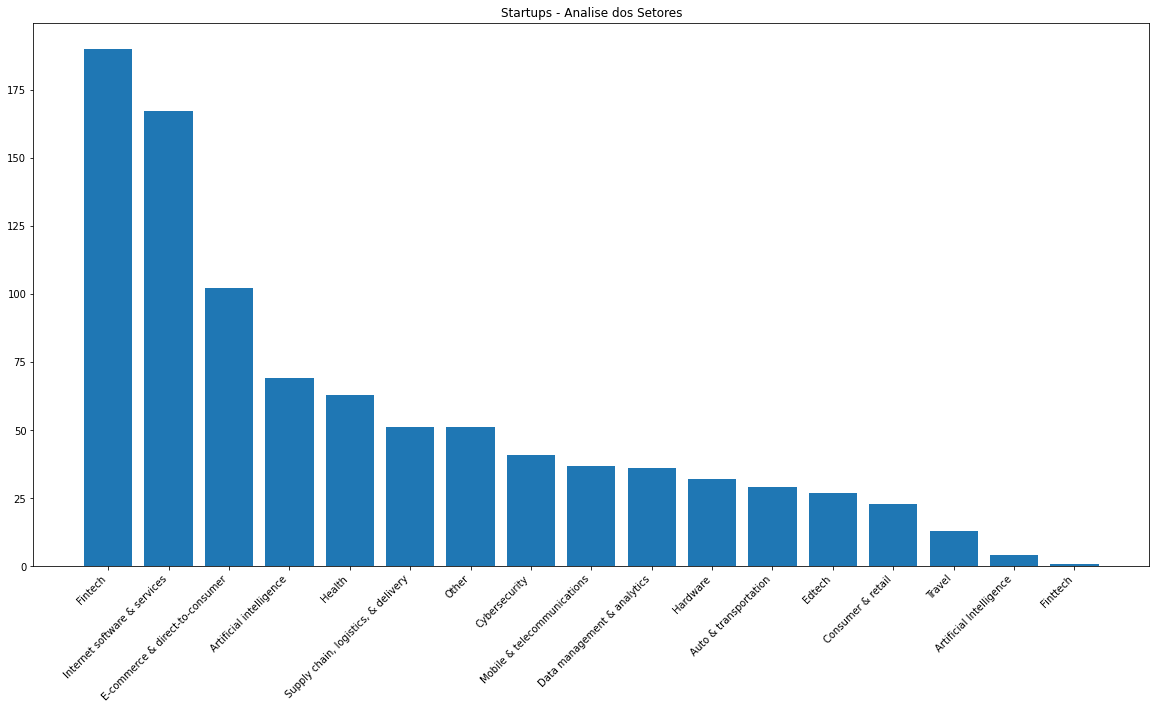

In [26]:
# grafico por setor percentual

plt.figure(figsize= (20,10))
plt.title('Startups - Analise dos Setores')
plt.bar(base_dados['Setor'].value_counts().index,
        base_dados['Setor'].value_counts())
plt.xticks(rotation= 45, ha= 'right');

In [30]:
# Analise Startups por países

analise = round(base_dados['País'].value_counts(normalize= True) * 100,2)
analise

United States           50.96
China                   18.06
India                    5.45
United Kingdom           3.95
Germany                  2.46
Israel                   2.24
France                   2.03
Canada                   1.60
Brazil                   1.60
South Korea              1.18
Singapore                1.18
Hong Kong                0.75
Japan                    0.64
Australia                0.64
Mexico                   0.53
Netherlands              0.53
Indonesia                0.43
Spain                    0.43
Sweden                   0.43
Switzerland              0.43
Ireland                  0.32
United Arab Emirates     0.32
Norway                   0.32
Belgium                  0.21
Thailand                 0.21
Denmark                  0.21
Philippines              0.21
Finland                  0.21
Colombia                 0.21
South Africa             0.21
Turkey                   0.21
Austria                  0.21
Chile                    0.11
Malaysia  

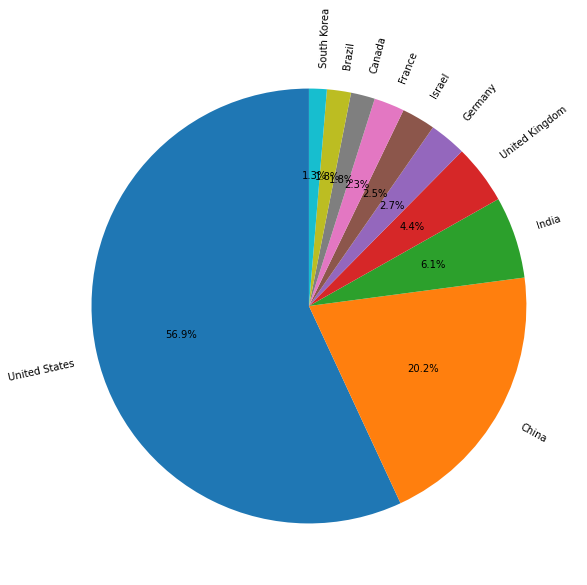

In [39]:
# grafico analise startups por país

plt.figure(figsize= (20,10), facecolor= 'white')
# plt.title('Analise Startups por País')
plt.pie(analise.head(10),
        labels= analise.index[0:10],
        shadow= False,
        startangle= 90,
        autopct= '%1.1f%%',
        rotatelabels= 45);

In [42]:
# analise de startups por ano

base_dados['Data de Adesão'] = pd.to_datetime(base_dados['Data de Adesão'])
base_dados['Data de Adesão'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 936 entries, 0 to 935
Series name: Data de Adesão
Non-Null Count  Dtype         
--------------  -----         
936 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.4 KB


In [43]:
# colunas mês e ano de adesão criadas

base_dados['Mês'] = pd.DatetimeIndex(base_dados['Data de Adesão']).month
base_dados['Ano'] = pd.DatetimeIndex(base_dados['Data de Adesão']).year
base_dados.head(3)

,Id,Empresa,Valor ($),Data de Adesão,País,Cidade,Setor,Investidores,Mês,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014


In [49]:
# tabela analitica por ano

analise_agrupada = base_dados.groupby( by= ['País', 'Ano', 'Mês', 'Empresa']).count()['Id'].reset_index()
analise_agrupada

,País,Ano,Mês,Empresa,Id
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1
933,United States,2021,12,YipitData,1
934,"United States,",2021,9,TrialSpark,1


In [50]:
analise_agrupada.loc[ analise_agrupada['País'] == 'Brazil' ]

,País,Ano,Mês,Empresa,Id
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1


In [53]:
# analisando valor startups

# base_dados['Valor ($)'].replace('$', '')
base_dados['Valor ($)'] = pd.to_numeric(base_dados['Valor ($)'].apply(lambda linha: linha.replace('$', '')))
base_dados['Valor ($)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 936 entries, 0 to 935
Series name: Valor ($)
Non-Null Count  Dtype  
--------------  -----  
936 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


In [61]:
analise_paises = base_dados.groupby(by= ['País']).sum()['Valor ($)'].reset_index().sort_values(['Valor ($)'], ascending= False)
analise_paises.head(10)

,País,Valor ($)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63
5,Brazil,61.05
38,Sweden,58.08
1,Australia,50.60
22,Israel,43.82
17,Hong Kong,41.45


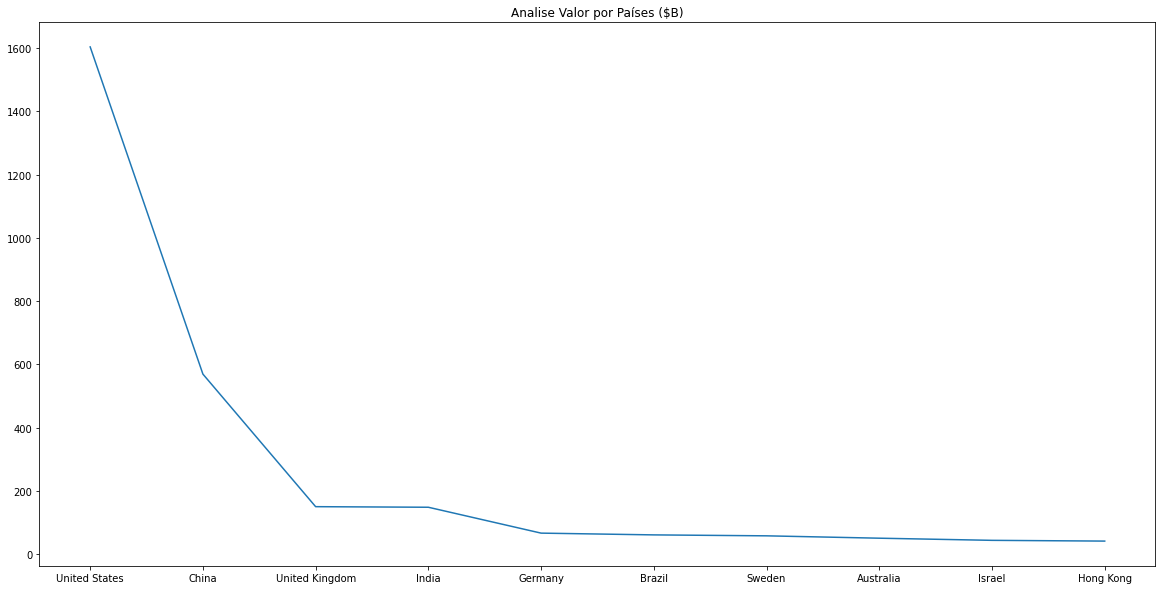

In [66]:
plt.figure(figsize= (20,10))
plt.title('Analise Valor por Países ($B)')
plt.plot(analise_paises['País'].head(10), analise_paises['Valor ($)'].head(10));

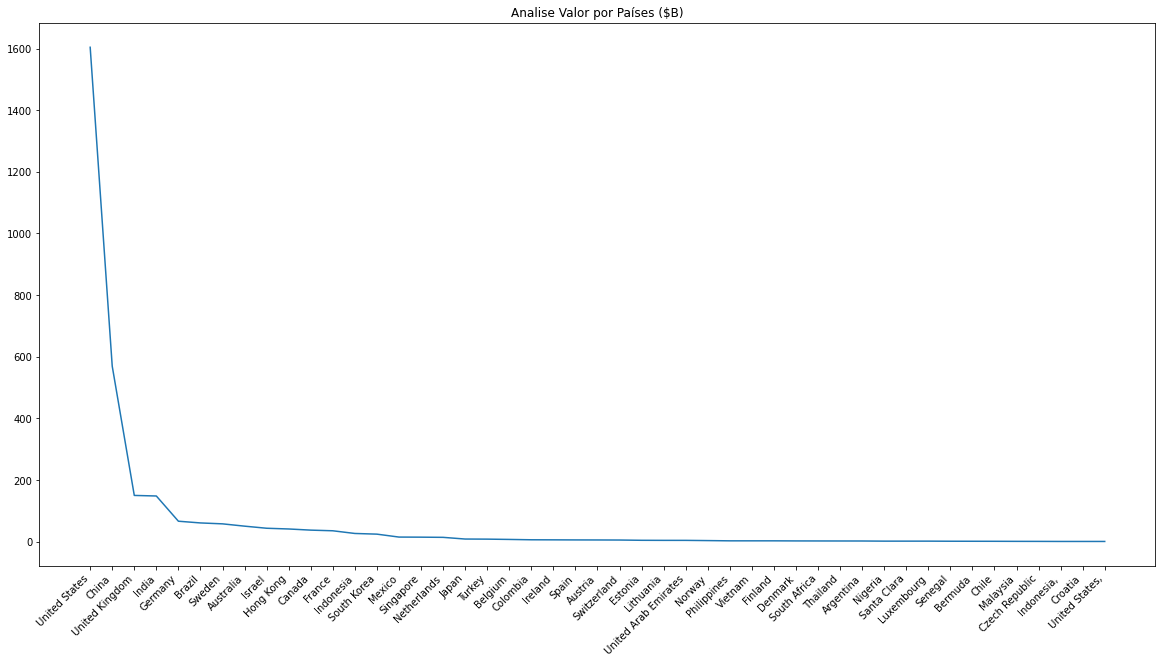

In [67]:
# grafico analise de valor por países

plt.figure(figsize= (20,10))
plt.title('Analise Valor por Países ($B)')
plt.plot(analise_paises['País'], analise_paises['Valor ($)'])
plt.xticks(rotation= 45, ha= 'right');